In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import tensorflow as tf
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import matplotlib.font_manager as fm 

font_fname = 'C:/Windows/Fonts/Malgun.ttf' #적용할 폰트
font_family = fm.FontProperties(fname=font_fname).get_name() #폰트 설정
plt.rcParams["font.family"] = font_family  #폰트 적용

In [3]:
# 부호 오류 고치기 코드
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
os.chdir(r"C:\Users\82109\project\2021 빅데이터 경진대회\최종")

In [6]:
comp_1_one=pd.read_csv('KBV공작_concattt.csv')

TRAIN_SPLIT = 53280

<AxesSubplot:>

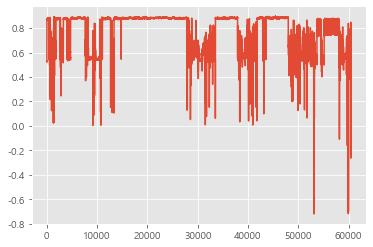

In [7]:
comp_1_one['역률평균'].plot()

In [8]:
comp_1_one.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
comp_1_one['TIMESTAMP'] = pd.to_datetime(comp_1_one['TIME'])
comp_1_one.drop('TIME', axis = 1, inplace=True)
comp_1_one.set_index('TIMESTAMP', inplace=True)

In [10]:
comp_1_one

,전류평균,온도,선간전압평균,상전압평균,유효전력평균,누적전력량,역률평균,주파수,전압고조파평균,무효전력평균
TIMESTAMP,,,,,,,,,,
2020-09-16 00:00:00,9.688000,26.875,218.667000,126.167000,1936.25,615574.000,0.526000,59.901000,5.664000,3121.25
2020-09-16 00:01:00,9.667000,26.250,218.000000,125.833000,1940.75,615607.000,0.529000,59.882000,5.697000,3107.50
2020-09-16 00:02:00,9.719000,26.250,218.000000,125.750000,1921.75,615640.000,0.526000,59.873000,5.599000,3098.25
2020-09-16 00:03:00,9.615000,26.250,218.417000,126.000000,1935.50,615673.000,0.527000,59.826000,5.371000,3116.50
2020-09-16 00:04:00,9.677000,26.875,218.333000,125.833000,1932.50,615706.000,0.527000,59.863000,5.404000,3106.25
...,...,...,...,...,...,...,...,...,...,...
2020-10-27 23:55:19,18.208334,16.875,217.916672,125.916664,4332.00,275498.531,0.629468,59.835430,7.421875,5347.50
2020-10-27 23:56:19,18.958334,17.500,218.750000,126.333336,4532.50,275571.500,0.631817,59.835415,7.454427,5560.50
2020-10-27 23:57:19,18.031250,17.500,218.916672,126.416664,4193.00,275644.100,0.614615,59.854070,7.031250,5381.50


In [11]:
X = comp_1_one
X_train = comp_1_one[:53280]
X_test = comp_1_one[53280:]
X_train = X_train[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균','역률평균']]
X_test = X_test[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]

In [12]:
from sklearn import preprocessing

# preprocessing.MinMaxScaler()
# preprocessing.StandardScaler()
# preprocessing.RobustScaler()
# preprocessing.Normalizer()

# 1. 스케일러를 선택 후 스케일러 객체를 지정한다
scaler = preprocessing.StandardScaler()

# 2. 스케일러 객체의 fit()함수를 이용하여 필요한 파라미터를 저장한다
# scaler_fit에는 칼럼별 최대와 최소값이 저장되어있다.
scaler_fit = scaler.fit(X)

# 3. 스케일러 객체의 transform()함수를 이용하여 스케일링을 수행한다
result=scaler_fit.transform(X)

In [13]:
def feature_engineering_scaling(scaler, X_train, X_test):
    # scaler파라미터는 아래 4개중 하나를 넣는다
    # preprocessing.MinMaxScaler()
    # preprocessing.StandardScaler()
    # preprocessing.RobustScaler()
    # preprocessing.Normalizer()
    scaler = scaler
    scaler_fit = scaler.fit(X_train)
    X_train_scaling = pd.DataFrame(scaler_fit.transform(X_train), 
                               index=X_train.index, columns=X_train.columns)
    X_test_scaling = pd.DataFrame(scaler_fit.transform(X_test), 
                               index=X_test.index, columns=X_test.columns)
    return X_train_scaling, X_test_scaling

In [14]:
X_train_scaling, X_test_scaling = feature_engineering_scaling(scaler, X_train, X_test)

In [15]:
X_train_scaling = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
X_test_scaling = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균', '역률평균']]
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

In [16]:
seasonal_lag = 6

for i in X_train_scaling.columns:
    X_train_scaling[i]=X_train_scaling[i].diff(seasonal_lag)
    
for i in X_test_scaling.columns:
    X_test_scaling[i]=X_test_scaling[i].diff(seasonal_lag)

In [17]:
X_train_scaling = X_train_scaling.dropna()
X_test_scaling = X_test_scaling.dropna()

In [18]:
y_train = X_train_scaling[['역률평균']]
y_test = X_test_scaling[['역률평균']]
X_train = X_train_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]
X_test = X_test_scaling[['전류평균', '온도', '유효전력평균', '누적전력량', '주파수', '전압고조파평균']]

In [19]:
X_train_scaling[:53274]

,전류평균,온도,유효전력평균,누적전력량,주파수,전압고조파평균,역률평균
TIMESTAMP,,,,,,,
2020-09-16 00:06:00,0.000000,-0.147561,0.003723,0.000615,-0.880137,-0.098144,0.013654
2020-09-16 00:07:00,0.000000,0.000000,-0.009515,0.000615,0.597236,-0.147971,-0.020480
2020-09-16 00:08:00,0.000000,0.000000,0.011790,0.000615,0.880137,-0.123057,-0.006827
2020-09-16 00:09:00,0.028471,0.000000,0.007653,0.000615,2.640412,-0.049072,-0.027307
2020-09-16 00:10:00,0.018457,0.000000,0.012204,0.000615,0.000000,-0.123057,-0.020480
...,...,...,...,...,...,...,...
2020-10-22 23:55:19,-0.856981,-0.147561,-0.594047,0.000973,0.586360,-0.049150,-0.717545
2020-10-22 23:56:19,0.323157,0.000000,0.931611,0.000913,-0.587209,0.196602,0.722269
2020-10-22 23:57:19,-0.631998,0.000000,-1.230082,0.000878,1.171212,0.073726,-0.969870


In [20]:
from pycaret.regression import *

clf = setup(data = X_train_scaling, target = '역률평균', train_size = 0.8, session_id = 6)

,Description,Value
0,session_id,6
1,Target,역률평균
2,Original Data,"(53274, 7)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(42619, 6)"


In [21]:
best5models = compare_models(sort = 'RMSE', n_select = 5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0438,0.0290,0.1675,0.7615,0.0697,1.0475,5.1260
rf,Random Forest Regressor,0.0439,0.0304,0.1721,0.7483,0.0703,1.0161,8.3570
lightgbm,Light Gradient Boosting Machine,0.0483,0.0320,0.1767,0.7345,0.0735,0.9841,0.2370
catboost,CatBoost Regressor,0.0461,0.0323,0.1772,0.7323,0.0721,0.9775,8.5330
xgboost,Extreme Gradient Boosting,0.0456,0.0336,0.1802,0.7234,0.0737,0.9677,1.3190
gbr,Gradient Boosting Regressor,0.0545,0.0367,0.1887,0.6974,0.0832,1.0140,1.4510
knn,K Neighbors Regressor,0.0578,0.0403,0.1992,0.6624,0.0879,1.1127,0.1640
dt,Decision Tree Regressor,0.0571,0.0499,0.2213,0.5825,0.0859,1.4887,0.1500
ada,AdaBoost Regressor,0.0983,0.0710,0.2641,0.4052,0.1342,2.6631,0.9020
lr,Linear Regression,0.0834,0.0723,0.2674,0.3886,0.1228,1.3648,0.9540


In [22]:
best5models

[ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=6, verbose=0, warm_start=False),
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=6, verbose=0, warm_start=False),
 LGBMRegresso

In [23]:
et = create_model('et', fold = 5, cross_validation = True)
rf = create_model('rf', fold = 5, cross_validation = True)
lh = create_model('lightgbm', fold = 5, cross_validation = True)
xg = create_model('xgboost', fold = 5, cross_validation = True)
cat = create_model('catboost', fold = 5, cross_validation = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0481,0.0433,0.2082,0.6781,0.0743,0.9491
1,0.0480,0.0364,0.1908,0.7278,0.0772,1.0492
2,0.0469,0.0313,0.1768,0.7422,0.0730,0.9651
3,0.0465,0.0313,0.1769,0.7050,0.0720,1.0057
4,0.0423,0.0198,0.1407,0.7879,0.0679,0.9957
Mean,0.0464,0.0324,0.1787,0.7282,0.0729,0.9930
SD,0.0021,0.0077,0.0222,0.0369,0.0031,0.0347


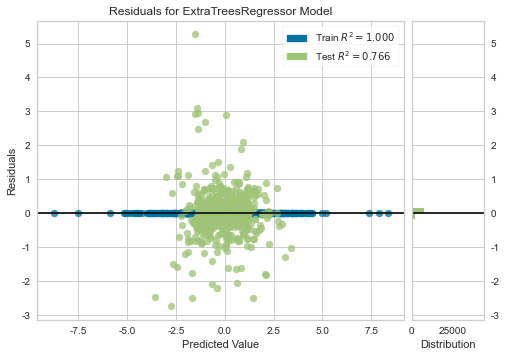

In [24]:
plot_model(et)

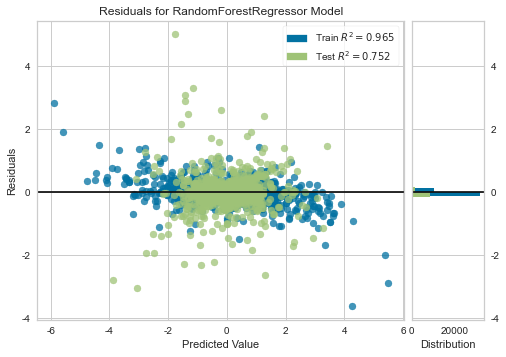

In [25]:
plot_model(rf)

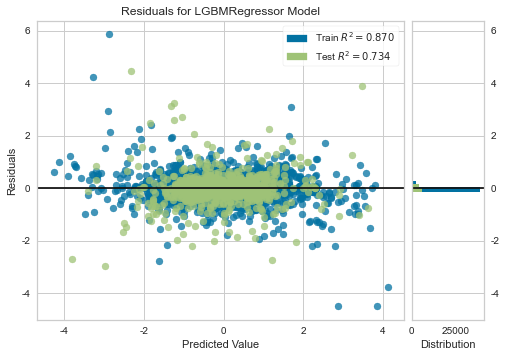

In [26]:
plot_model(lh)

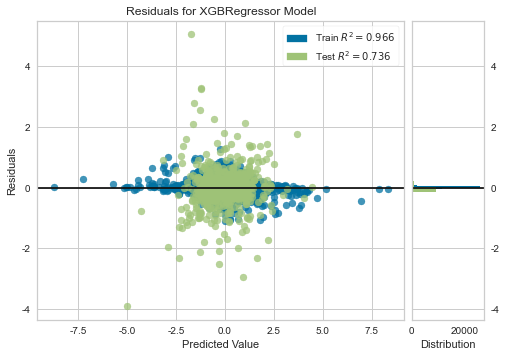

In [27]:
plot_model(xg)

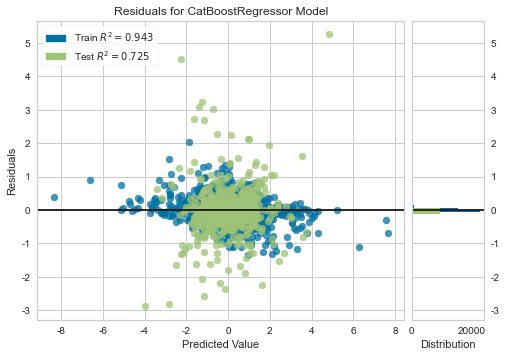

In [28]:
plot_model(cat)

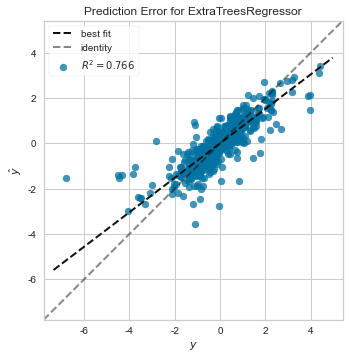

In [29]:
plot_model(et, plot='error')

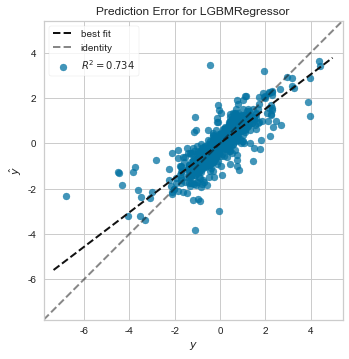

In [30]:
plot_model(lh, plot='error')

In [32]:
final_model = finalize_model(et)
pred = predict_model(final_model, data = X_test)

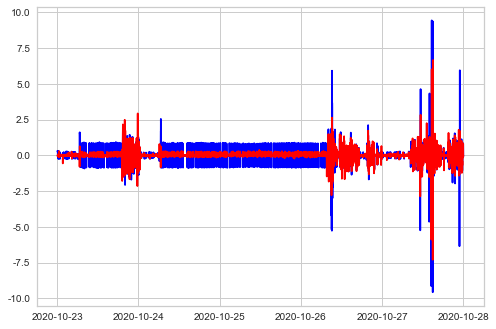

In [33]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [34]:
final_model = finalize_model(lh)
pred = predict_model(final_model, data = X_test)

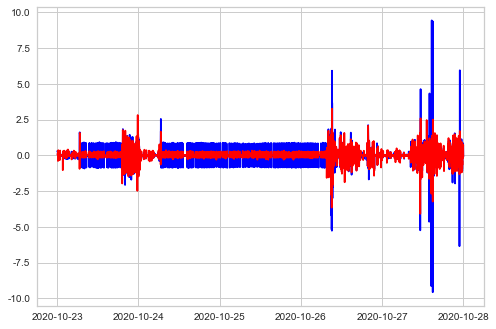

In [35]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')

In [36]:
# 모델 블렌딩

blender_specific = blend_models(estimator_list = [et,rf,lh], optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0479,0.0496,0.2226,0.6744,0.0734,0.9101
1,0.0423,0.0280,0.1672,0.7612,0.0671,0.9684
2,0.0446,0.0368,0.1919,0.7394,0.0734,0.9541
3,0.0475,0.0317,0.1781,0.7485,0.0764,1.0442
4,0.0419,0.0214,0.1464,0.7963,0.0680,0.9740
5,0.0463,0.0381,0.1953,0.7220,0.0724,0.9234
6,0.0436,0.0274,0.1655,0.7554,0.0685,0.9954
7,0.0430,0.0199,0.1411,0.8008,0.0635,0.9941
8,0.0395,0.0158,0.1257,0.8290,0.0627,0.9782
9,0.0393,0.0192,0.1384,0.7966,0.0645,0.9423


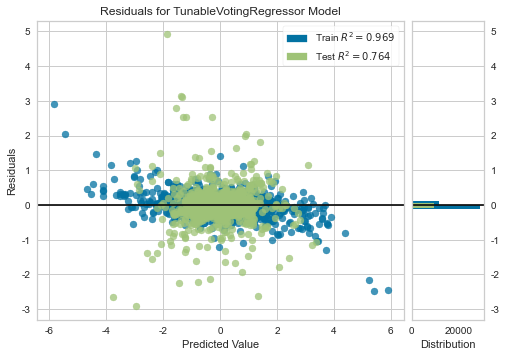

In [37]:
plot_model(blender_specific)

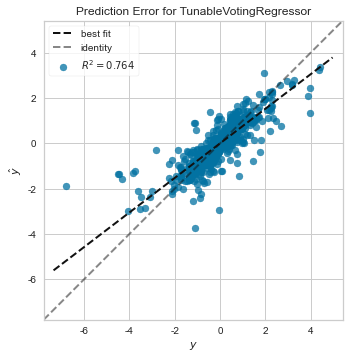

In [38]:
plot_model(blender_specific, plot='error')

In [40]:
final_model = finalize_model(blender_specific)
pred = predict_model(final_model, data = X_test)

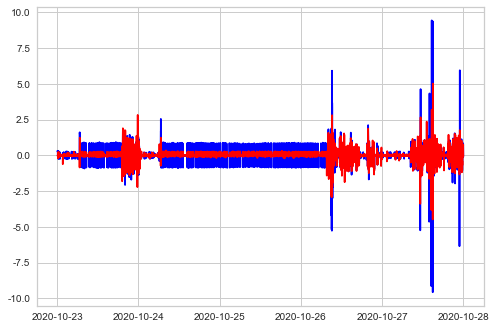

In [41]:
plt.plot(X_test_scaling.index, X_test_scaling['역률평균'],color = 'blue')
plt.plot(X_test_scaling.index, pred['Label'], color = 'red')